In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
import time

## Ligue 1

Below is an image of the end-of-season standings. Take a moment to scan over the table and then let's get into our analysis.

<img src="Tables/Ligue1Table.png">

In [5]:
#data cleaning
df = pd.read_csv("TopGoals/ligue1TopGoals.csv")
df = df.head(n=20)
df = df.drop(columns=['Unnamed: 0', 'YC', 'RC', 'F', 'OFF', 'HG', 'KG'])
df.rename(columns={'STANDARD':'Name', 'GP': 'Games', 'GF':'Goals', 'A':'Assists', 'SOG':'Shots on Goal', 'S':'Total Shots'}, inplace=True)
for i in range(20):
    if(df.at[i, 'Name'].split()[1] == df.at[i, 'Name'].split()[2]):
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1]
    else:
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1] + df.at[i, 'Name'].split()[2]
    df.at[i, 'Goals/Game'] = (df.at[i, 'Goals']/df.at[i, 'Games'])
#print(df)
#create 2 new columns for shooting accuracy and coversion rate
#shooting accuracy is given by (shots on goal/total shots)*100%
#conversion rate is given by (goals/shots on goal)*100%
for i in range(20):
    df.at[i, 'Shooting Accuracy(%)'] = (df.at[i, 'Shots on Goal']/df.at[i, 'Total Shots'])*100
    df.at[i, 'Conversion Rate(%)'] = (df.at[i, 'Goals']/df.at[i, 'Shots on Goal'])*100
print(df)

             Name  Games  Goals  Assists  Shots on Goal  Total Shots  \
0         ParisSG     38    105       70            220          557   
1            Lyon     38     70       51            256          641   
2           Lille     38     68       47            201          478   
3       Marseille     38     60       45            180          517   
4      St.Etienne     38     59       39            183          485   
5   StrasbourgSTR     38     58       43            159          386   
6        NimesNIM     38     57       37            184          502   
7          Rennes     38     55       33            163          458   
8     Montpellier     38     53       29            174          489   
9          Nantes     38     48       27            156          513   
10         Angers     38     44       28            167          448   
11          Reims     38     39       26            141          394   
12         Monaco     38     38       24            166         

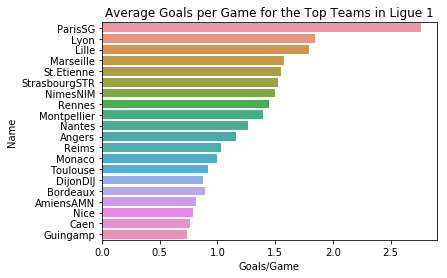

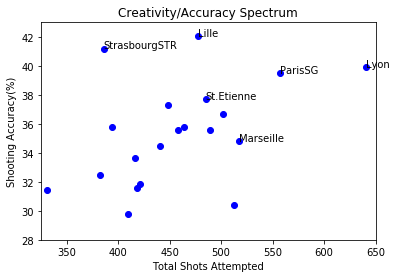

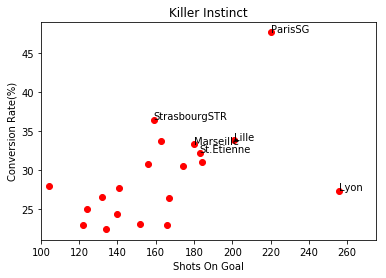

In [10]:
#visualization of top scorers per game
#df1 = df.sort_values(['Goals/Game'])
bar1 = sns.barplot(x='Goals/Game', y='Name', data=df)
#bar1.set_xticklabels(bar1.get_xticklabels(),rotation=90)
plt.title('Average Goals per Game for the Top Teams in Ligue 1')
plt.show()

plt.plot(df["Total Shots"], df["Shooting Accuracy(%)"], 'bo')
plt.axis([325, 650, 28, 43])
plt.title('Creativity/Accuracy Spectrum')
plt.xlabel("Total Shots Attempted")
plt.ylabel("Shooting Accuracy(%)")
for i in range(6):
    plt.annotate(df.at[i, 'Name'], xy=(df.at[i,'Total Shots'], df.at[i, 'Shooting Accuracy(%)']))
plt.show()

plt.plot(df["Shots on Goal"], df["Conversion Rate(%)"], 'ro')
plt.axis([100, 275, 21, 49])
plt.title('Killer Instinct')
plt.xlabel("Shots On Goal")
plt.ylabel("Conversion Rate(%)")
for i in range(6):
    plt.annotate(df.at[i, 'Name'], xy=(df.at[i,'Shots on Goal'], df.at[i, 'Conversion Rate(%)']))
plt.show()